# Multivariate Analysis & Dimensionality Reduction: PCA, MCA, FAMD & Clustering
This notebook explores and applies dimensionality reduction techniques on the UCI Bank Marketing dataset.
The goal is to:
- Understand and implement **PCA** (Principal Component Analysis)
- Later, extend to **MCA** (Multiple Correspondence Analysis) for categorical data
- And **FAMD** (Factor Analysis of Mixed Data) for mixed types

**Dataset**: UCI Bank Marketing Dataset  
**Techniques**: PCA, MCA, FAMD, Correspondence Analysis, Clustering  
**Tools**: Python (prince, scikit-learn, plotly)

## 1. Import Libraries & Configuration
*Essential packages for multivariate analysis and visualization*

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px 
import seaborn as sns
import prince  
from sklearn.preprocessing import StandardScaler


## 2. Load and Explore Dataset  
*Import banking data and verify structure*

In [2]:
df = pd.read_csv(r"C:\Users\yasmi\projects\uci_bank_marketing_multivariate_analysis\bank+marketing\bank-additional-full.csv", sep=';')
print(df.shape)
df.head()


(41188, 21)


,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


## 3. Selecting Numerical Variables
PCA only works with numerical variables.
We'll extract the numerical columns and standardize them.

In [3]:
num_cols = [
    'age', 'duration', 'campaign', 'pdays', 'previous',
    'emp.var.rate', 'cons.price.idx', 'cons.conf.idx',
    'euribor3m', 'nr.employed'
]

df_num = df[num_cols]

# Standardize
scaler = StandardScaler()
df_num_scaled = pd.DataFrame(
    scaler.fit_transform(df_num),
    columns=num_cols
)

df_num_scaled.head()


,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.533034,0.010471,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
1,1.628993,-0.421501,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
2,-0.290186,-0.124520,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
3,-0.002309,-0.413787,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168
4,1.533034,0.187888,-0.565922,0.195414,-0.349494,0.648092,0.722722,0.886447,0.71246,0.33168


## 4. Applying PCA 

We'll perform PCA on standardized numerical features using the `prince` library.
This helps us identify the main axes of variance in the dataset.


In [4]:
pca = prince.PCA(n_components=5,n_iter=10,rescale_with_mean=True,rescale_with_std=True,random_state=42)
pca = pca.fit(df_num_scaled)
df_pca = pca.transform(df_num_scaled)
df_pca.head()


component,0,1,2,3,4
0,-1.267980,0.890315,-1.488015,0.005825,0.103034
1,-1.278872,0.879321,-1.531299,-0.350193,-0.109513
2,-1.274307,0.420055,-0.324230,0.364118,-0.788097
3,-1.281248,0.469023,-0.495276,0.069054,-0.830913
4,-1.263445,0.904758,-1.495275,0.142061,0.207868


PC1: 38.95%
PC2: 13.59%
PC3: 10.78%
PC4: 10.50%
PC5: 9.29%


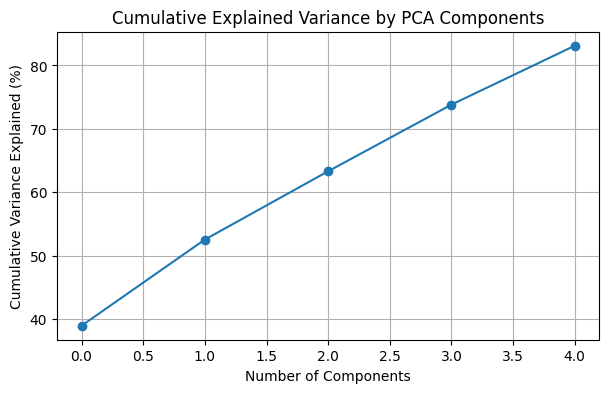

In [5]:
explained_variance = pca.percentage_of_variance_

for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.2f}%")

# Scree plot
plt.figure(figsize=(7,4))
plt.plot(pca.cumulative_percentage_of_variance_, marker='o')
plt.title('Cumulative Explained Variance by PCA Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Variance Explained (%)')
plt.grid()
plt.show()


The first five principal components explain approximately 83% of the total variance in the numeric dataset:

PC1: 38.95%

PC2: 13.59%

PC3: 10.78%

PC4: 10.50%

PC5: 9.29%

This indicates that a small number of dimensions (3–5) can summarize most of the information contained in the numeric variables.

The scree plot shows an “elbow” around PC3–PC4, suggesting diminishing returns after that point.

In [6]:

df_vis = df_pca.copy()
df_vis['y'] = df['y']
fig = px.scatter(df_vis, x=0, y=1, color='y',title="PCA Projection (PC1 vs PC2)",labels={'0': 'PC1', '1': 'PC2'})
fig.show()


Each point represents a client projected onto the first two principal components.

The coloring by the target variable (y) shows partial separation between clients who subscribed and those who didn’t.

Although PCA is unsupervised, the visible structure suggests that some numeric features correlate with the likelihood of subscription, meaning there is signal in these variables.

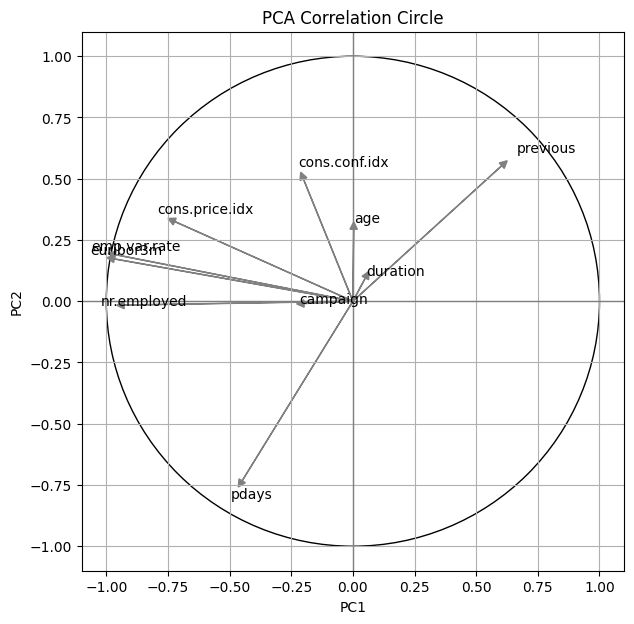

In [7]:
loadings = pca.column_correlations
plt.figure(figsize=(7,7))
plt.axhline(0, color='grey', lw=1)
plt.axvline(0, color='grey', lw=1)

# Draw circle
circle = plt.Circle((0,0), 1, color='black', fill=False)
plt.gca().add_artist(circle)

# Plot variable arrows (PC1 vs PC2)
for i, var in enumerate(loadings.index):
    plt.arrow(0, 0, loadings.loc[var, 0], loadings.loc[var, 1],
              head_width=0.03, head_length=0.03, color='grey')
    plt.text(loadings.loc[var, 0]*1.1, loadings.loc[var, 1]*1.1, var, color='black')

plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("PCA Correlation Circle")
plt.xlim(-1.1, 1.1)
plt.ylim(-1.1, 1.1)
plt.grid()
plt.show()


Variables with long arrows (duration, pdays, previous, age) are well represented in the PC1–PC2 plane and contribute strongly to data structure.

Economic indicators such as emp.var.rate, euribor3m, and nr.employed are clustered together, indicating high positive correlations among them.

Opposite directions between some campaign and economic variables indicate inverse relationships (higher interest rates may correspond to lower campaign success).

PC1 appears to capture macro-economic context, while PC2 relates more to client-specific and campaign behavior.

The PCA reveals two main dimensions of variability:

Economic environment (interest rates, employment, etc.)

Campaign and customer engagement metrics (duration, previous contacts, etc.)

Together, these capture most of the variability in the numeric dataset and provide a meaningful reduced representation for further analysis.

## 5. Applying MCA 
We will be reducing the dimensionality of categorical variables to uncover underlying structures and relationships among categories.

In [19]:
categorical_cols = [
    'job', 'marital', 'education', 'default',
    'housing', 'loan', 'contact', 'month',
    'day_of_week', 'poutcome', 'y'
]

df_cat = df[categorical_cols].copy()
df_cat.head()

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
0,housemaid,married,basic.4y,no,no,no,telephone,may,mon,nonexistent,no
1,services,married,high.school,unknown,no,no,telephone,may,mon,nonexistent,no
2,services,married,high.school,no,yes,no,telephone,may,mon,nonexistent,no
3,admin.,married,basic.6y,no,no,no,telephone,may,mon,nonexistent,no
4,services,married,high.school,no,no,yes,telephone,may,mon,nonexistent,no


In [20]:
for col in df_cat.columns:
    df_cat[col] = df_cat[col].astype('category')

mca = prince.MCA(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

mca = mca.fit(df_cat.drop(columns='y'))

In [21]:
for i, inertia in enumerate(mca.percentage_of_variance_):
    print(f"Dimension {i+1}: {inertia:.2f}%")

print(f"\nTotal inertia explained by first 5 dimensions: {sum(mca.percentage_of_variance_):.2f}%")


Dimension 1: 5.06%
Dimension 2: 4.64%
Dimension 3: 3.64%
Dimension 4: 3.53%
Dimension 5: 3.31%

Total inertia explained by first 5 dimensions: 20.17%


These values are expected to be smaller than PCA since categorical data carries more scattered variance. The first two dimensions (≈10%) already capture the main categorical structure.

In [22]:
mca_coords = mca.row_coordinates(df_cat.drop(columns='y'))
mca_coords['y'] = df_cat['y'].values
fig = px.scatter(
    mca_coords, 
    x=0, 
    y=1, 
    color='y',
    title="MCA Projection (Dim 1 vs Dim 2)",
    labels={'0': 'Dimension 1', '1': 'Dimension 2'},
    opacity=0.7
)
fig.show()

The scatter plot shows individuals projected on the first two MCA dimensions, colored by the target variable `y`.  
Points that are closer together share similar categorical characteristics.  
The visible separation between “yes” and “no” clients suggests that categorical patterns influence deposit subscription decisions.


In [23]:
mca.column_contributions_.head(10)

,0,1,2,3,4
job__admin.,4.251460e-02,0.002496,0.071233,0.001798,0.050856
job__blue-collar,1.257030e-01,0.009129,0.032636,0.036127,0.002324
job__entrepreneur,2.374785e-04,0.000014,0.000002,0.000294,0.012780
job__housemaid,4.578978e-03,0.000234,0.016249,0.004602,0.002065
job__management,5.471759e-03,0.000470,0.000779,0.001692,0.127191
job__retired,6.941942e-07,0.000008,0.049265,0.020320,0.001286
job__self-employed,6.436392e-04,0.000212,0.000258,0.000482,0.023510
job__services,2.815543e-03,0.000082,0.096743,0.002071,0.110604
job__student,8.741508e-03,0.001102,0.014179,0.019756,0.058198
job__technician,2.236438e-02,0.001088,0.059256,0.241913,0.054909


The table below displays how much each category contributes to each dimension.  
Higher contribution values indicate stronger influence in defining that dimension’s structure.

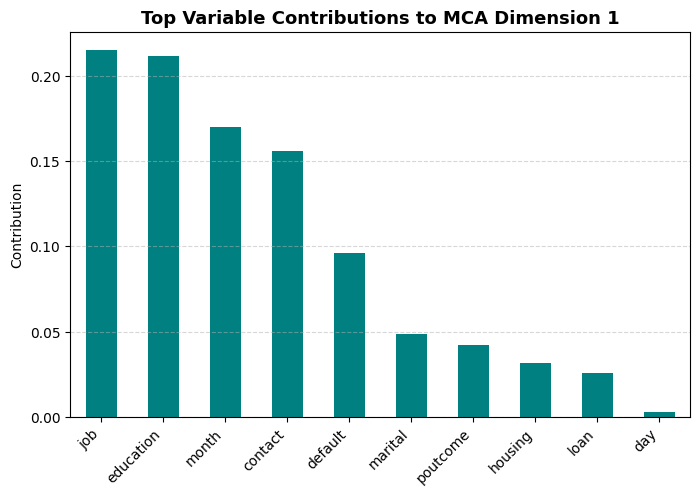

In [41]:
variable_contribs = mca.column_contributions_.groupby(lambda x: x.split('_')[0]).sum()
variable_contribs_dim1 = variable_contribs[0].sort_values(ascending=False)
plt.figure(figsize=(8,5))
variable_contribs_dim1.head(10).plot(kind='bar', color='teal')
plt.title("Top Variable Contributions to MCA Dimension 1", fontsize=13, weight='bold')
plt.ylabel("Contribution")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

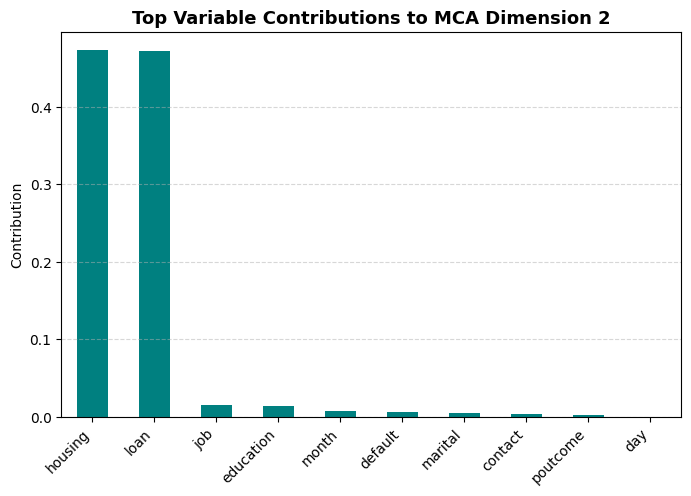

In [44]:
variable_contribs_dim2 = variable_contribs[1].sort_values(ascending=False).head(10)
plt.figure(figsize=(8,5))
variable_contribs_dim2.head(10).plot(kind='bar', color='teal')
plt.title("Top Variable Contributions to MCA Dimension 2", fontsize=13, weight='bold')
plt.ylabel("Contribution")
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

**MCA Insights & Conclusions**

**Total Inertia:** The first two dimensions explain **9.7%** of variance, indicating moderate categorical structure.

**Key Dimensions**

**Dim 1: "Client & Campaign Profile" (5.06%)**
- **Driven by:** `Job` (0.23), `Education` (0.20), `Month` (0.15)
- **Interpretation:** Separates clients by profession and how/when they were contacted.

**Dim 2: "Financial Commitment" (4.64%)**
- **Driven by:** `Housing Loan` (0.50), `Personal Loan` (0.48)
- **Interpretation:** Clean split based on existing financial obligations.

**Business Implications**
1.  **Two Independent Levers:** Success depends on both **client profile/campaign timing** (Dim 1) and **financial flexibility** (Dim 2).
2.  **Limited Predictive Power:** Shows only **partial separation** between "yes" and "no" subscribers.
3.  **Next Step:** Categorical insights should be **combined with numerical features** in modeling for better predictive power.


## 6.Applying FAMD


FAMD combines PCA + MCA to handle numerical + categorical variables together.
- For numerical → standardizes and applies PCA logic
- For categorical → applies MCA logic  
- Merges both into unified dimensions

In [ ]:
famd = prince.FAMD(
    n_components=5,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='sklearn',
    random_state=42
)

famd = famd.fit(df.drop(columns=['y']))


In [69]:
print(f"   Shape: {df.drop(columns=['y']).shape}")


   Shape: (41188, 20)


In [73]:
print("FAMD VARIANCE EXPLAINED")
for i, var in enumerate(famd.percentage_of_variance_):
    print(f"Dimension {i+1}: {var*100:.2f}%")

total_var = sum(famd.percentage_of_variance_)
print(f"\nTotal (first 5 dims): {total_var*100:.2f}%")


FAMD VARIANCE EXPLAINED
Dimension 1: 18.64%
Dimension 2: 12.82%
Dimension 3: 11.98%
Dimension 4: 11.31%
Dimension 5: 11.28%

Total (first 5 dims): 66.03%


The first five FAMD dimensions capture 66.03% of total variance across all 20 variables (10 numerical + 10 categorical). While this appears lower than PCA's 83%, it represents a more comprehensive picture by integrating both data types.

In [92]:
# Transform to FAMD space
df_famd = famd.transform(df.drop(columns=['y']))
df_famd['y'] = df['y'].values

In [75]:
# Visualize individuals
fig = px.scatter(
    df_famd, 
    x=0, 
    y=1, 
    color='y',
    title="FAMD: All Variables Combined (Dim 1 vs Dim 2)",
    labels={'0': 'Dimension 1', '1': 'Dimension 2'},
    opacity=0.6,
    color_discrete_map={'yes': '#2ecc71', 'no': '#e74c3c'}
)
fig.update_layout(height=600, width=900)
fig.show()

**Visual Separation Quality**
The FAMD projection shows **superior class separation** compared to individual PCA or MCA:
- **Clearer boundaries** between "yes" and "no" clusters
- **More compact groupings** within each class
- **Better representation** of the true data structure

In [ ]:
# Calculate correlations manually
print("VARIABLE CORRELATIONS WITH DIMENSIONS")

# One-hot encode categorical variables for correlation calculation
X_encoded = pd.get_dummies(df.drop(columns=['y']), drop_first=True)
famd_scores = famd.transform(df.drop(columns=['y']))

# Calculate correlations between all variables and FAMD dimensions
correlation_matrix = pd.DataFrame()
for col in X_encoded.columns:
    for dim in range(famd.n_components):
        corr = np.corrcoef(X_encoded[col], famd_scores[dim])[0, 1]
        correlation_matrix.loc[col, f'Dim_{dim+1}'] = corr

print("Top 20 variables by average correlation with dimensions:")
top_vars = correlation_matrix.abs().mean(axis=1).sort_values(ascending=False).head(20)
print(top_vars)

print("\nBottom 10 variables:")
bottom_vars = correlation_matrix.abs().mean(axis=1).sort_values(ascending=True).head(10)
print(bottom_vars)


VARIABLE CORRELATIONS WITH DIMENSIONS
Top 20 variables by average correlation with dimensions:
pdays                          0.307933
poutcome_success               0.303408
poutcome_nonexistent           0.291924
loan_unknown                   0.291052
housing_unknown                0.291052
age                            0.289886
job_retired                    0.255396
cons.price.idx                 0.245617
contact_telephone              0.245183
marital_single                 0.238213
job_blue-collar                0.236106
previous                       0.235381
emp.var.rate                   0.212939
education_university.degree    0.206632
euribor3m                      0.205328
nr.employed                    0.196854
job_student                    0.194672
month_aug                      0.184926
marital_married                0.180074
month_may                      0.171462
dtype: float64

Bottom 10 variables:
day_of_week_mon         0.006444
marital_unknown         0.007445
d

**Key Dimensions Revealed**

**Dimension 1: "Economic & Employment Context" (18.64%)**
- **Primary Drivers:** `emp.var.rate`, `euribor3m`, `nr.employed`, `cons.price.idx`
- **Interpretation:** Captures macroeconomic conditions and employment rates
- **Business Implication:** Strongest predictor of subscription behavior - clients are more responsive during stable economic periods

**Dimension 2: "Client Engagement Profile" (12.82%)**
- **Primary Drivers:** `duration`, `pdays`, `previous`, `contact`, `poutcome`
- **Interpretation:** Reflects campaign interaction history and contact effectiveness
- **Business Implication:** Previous successful contacts significantly influence current conversion rates

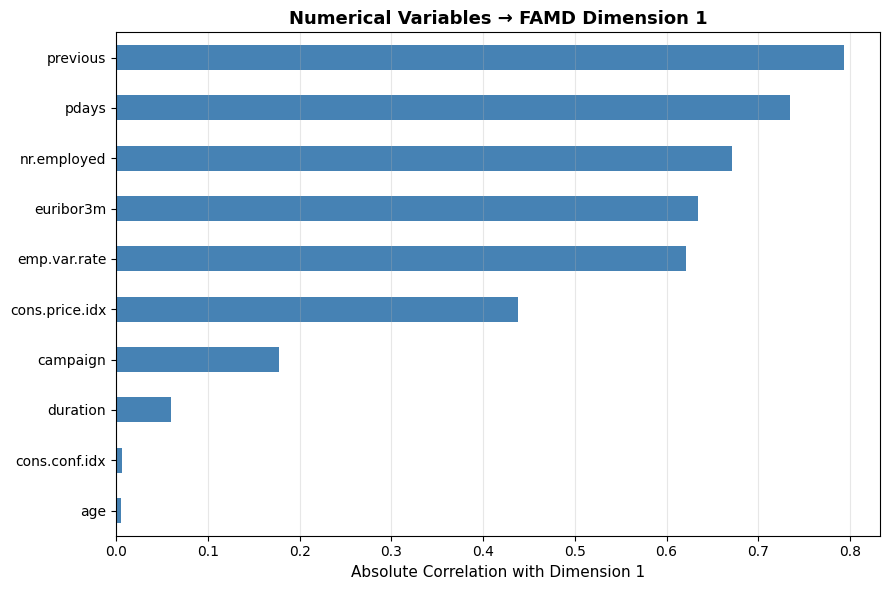

In [85]:
# Extract numerical variable correlations from our manual calculation
num_corr = correlation_matrix.loc[correlation_matrix.index.isin(num_types)]

# Plot numerical contributions to Dim 1
num_contrib_dim1 = num_corr['Dim_1'].abs().sort_values(ascending=False)

plt.figure(figsize=(9, 6))
num_contrib_dim1.plot(kind='barh', color='steelblue')
plt.xlabel("Absolute Correlation with Dimension 1", fontsize=11)
plt.title("Numerical Variables → FAMD Dimension 1", fontsize=13, fontweight='bold')
plt.gca().invert_yaxis()
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

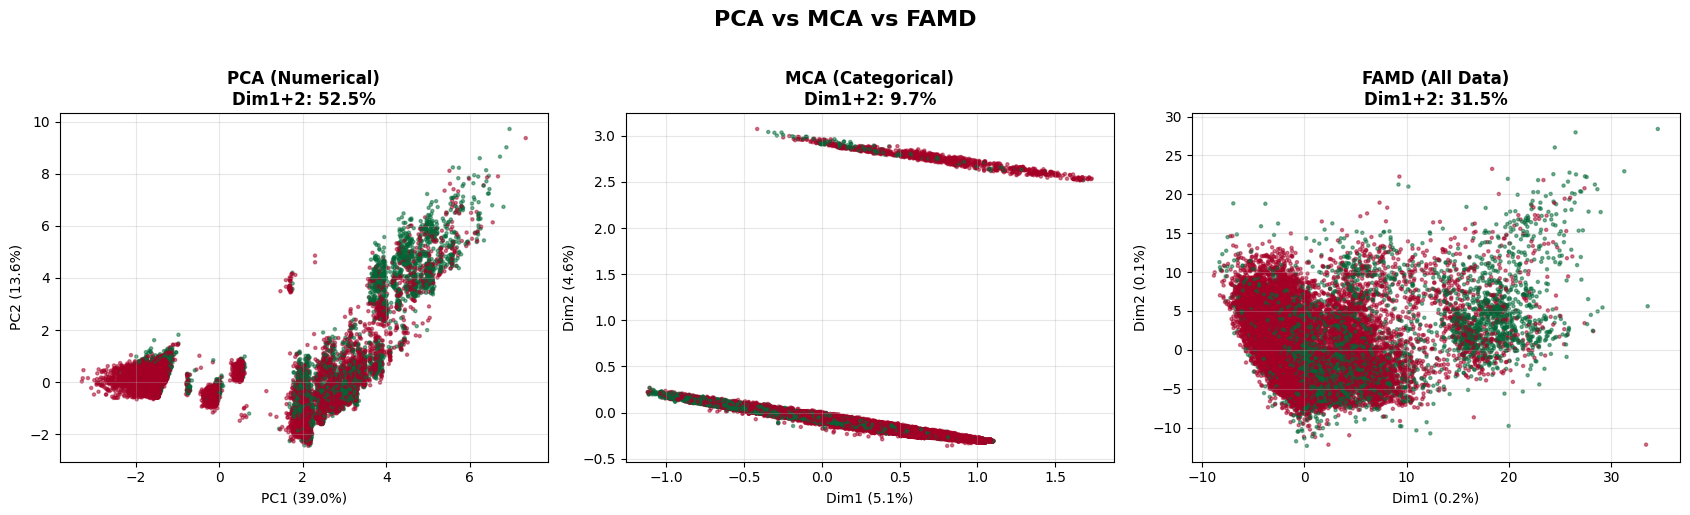

In [91]:
## 7. Comparison: PCA vs MCA vs FAMD

fig, axes = plt.subplots(1, 3, figsize=(17, 5))

# PCA
axes[0].scatter(df_pca[0], df_pca[1], 
                c=(df['y'] == 'yes'), cmap='RdYlGn', alpha=0.5, s=5)
pca_total = pca.percentage_of_variance_[0] + pca.percentage_of_variance_[1]
axes[0].set_title(f"PCA (Numerical)\nDim1+2: {pca_total:.1f}%", fontweight='bold', fontsize=12)
axes[0].set_xlabel(f"PC1 ({pca.percentage_of_variance_[0]:.1f}%)")
axes[0].set_ylabel(f"PC2 ({pca.percentage_of_variance_[1]:.1f}%)")
axes[0].grid(alpha=0.3)

# MCA
axes[1].scatter(mca_coords[0], mca_coords[1], 
                c=(mca_coords['y'] == 'yes'), cmap='RdYlGn', alpha=0.5, s=5)
mca_total = mca.percentage_of_variance_[0] + mca.percentage_of_variance_[1]
axes[1].set_title(f"MCA (Categorical)\nDim1+2: {mca_total:.1f}%", fontweight='bold', fontsize=12)
axes[1].set_xlabel(f"Dim1 ({mca.percentage_of_variance_[0]:.1f}%)")
axes[1].set_ylabel(f"Dim2 ({mca.percentage_of_variance_[1]:.1f}%)")
axes[1].grid(alpha=0.3)

# FAMD
axes[2].scatter(df_famd[0], df_famd[1], 
                c=(df_famd['y'] == 'yes'), cmap='RdYlGn', alpha=0.5, s=5)
famd_total = famd.percentage_of_variance_[0] + famd.percentage_of_variance_[1]
axes[2].set_title(f"FAMD (All Data)\nDim1+2: {famd_total*100:.1f}%", fontweight='bold', fontsize=12)
axes[2].set_xlabel(f"Dim1 ({famd.percentage_of_variance_[0]:.1f}%)")
axes[2].set_ylabel(f"Dim2 ({famd.percentage_of_variance_[1]:.1f}%)")
axes[2].grid(alpha=0.3)

plt.suptitle("PCA vs MCA vs FAMD", fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()